In [27]:
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import pairwise_distances
import pandas as pd

In [2]:
blobs, labels = make_blobs(n_samples=2000, n_features=10)

In [3]:
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,-9.499132,4.064768,-9.999452,5.695239,-6.439015,-3.866955,-1.556918,8.486857,0.231681,-8.501039
1,-9.716234,-1.587991,1.060003,-2.814675,-2.012131,5.992320,0.791141,2.627567,-6.419475,11.393292
2,4.080710,0.231036,5.669484,-5.447774,7.650982,-8.593288,1.203353,5.222857,5.001376,-2.589245
3,-8.124532,3.579313,-11.011571,5.656018,-5.251025,-6.388306,-3.792518,9.893061,-0.244891,-10.801966
4,-8.477054,4.202084,-9.478636,6.088457,-5.564251,-6.118512,-4.459075,7.499355,-0.111239,-11.545479


In [5]:
import hdbscan

In [10]:
clusterer = hdbscan.HDBSCAN()

In [11]:
clusterer.fit(blobs)

HDBSCAN()

In [12]:
clusterer.labels_

array([0, 1, 2, ..., 1, 0, 0])

In [13]:
clusterer.labels_.max()

2

In [14]:
clusterer.probabilities_

array([0.68260897, 0.75208992, 0.68689611, ..., 0.75868114, 0.66280537,
       0.56564023])

In [33]:
hdbscan.dist_metrics.METRIC_MAPPING.keys()

dict_keys(['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'cosine', 'arccos', 'pyfunc'])

In [31]:
def clust_methods(data):
    results = {}
    for metric in hdbscan.dist_metrics.METRIC_MAPPING.keys():
        try:
            if metric == 'minkowski':
                clusterer = hdbscan.HDBSCAN(metric=metric, p=0.05)
                clusterer.fit(data)
            elif metric == 'precomputed':
                distance_matrix = pairwise_distances(data)
                clusterer = hdbscan.HDBSCAN(metric=metric)
                clusterer.fit(distance_matrix)
            else:
                clusterer = hdbscan.HDBSCAN(metric=metric)
                clusterer.fit(data)

            results[metric] = clusterer.probabilities_
        except Exception as e:
            print(f'{metric} metric failed: {str(e)}')
    
    return results

In [32]:
clusters_comp = clust_methods(blobs)

seuclidean metric failed: __init__() takes exactly 1 positional argument (0 given)
mahalanobis metric failed: Must provide either V or VI for Mahalanobis distance
wminkowski metric failed: __init__() takes exactly 2 positional arguments (0 given)
haversine metric failed: Haversine distance only valid in 2 dimensions
cosine metric failed: Unrecognized metric 'cosine'
arccos metric failed: Unrecognized metric 'arccos'
pyfunc metric failed: __init__() takes exactly 1 positional argument (0 given)


In [35]:
clusters_comp

{'euclidean': array([0.68260897, 0.75208992, 0.68689611, ..., 0.75868114, 0.66280537,
        0.56564023]),
 'l2': array([0.68260897, 0.75208992, 0.68689611, ..., 0.75868114, 0.66280537,
        0.56564023]),
 'minkowski': array([0.68260897, 0.75208992, 0.68689611, ..., 0.75868114, 0.66280537,
        0.56564023]),
 'p': array([0.68260897, 0.75208992, 0.68689611, ..., 0.75868114, 0.66280537,
        0.56564023]),
 'manhattan': array([0.67436704, 0.75198658, 0.65234803, ..., 0.66791259, 0.67392031,
        0.56199034]),
 'cityblock': array([0.67436704, 0.75198658, 0.65234803, ..., 0.66791259, 0.67392031,
        0.56199034]),
 'l1': array([0.67436704, 0.75198658, 0.65234803, ..., 0.66791259, 0.67392031,
        0.56199034]),
 'chebyshev': array([0.69383491, 0.68685752, 0.61978163, ..., 0.74460048, 0.64401795,
        0.55932733]),
 'infinity': array([0.69383491, 0.68685752, 0.61978163, ..., 0.74460048, 0.64401795,
        0.55932733]),
 'hamming': array([1., 0., 0., ..., 0., 0., 0.]),
 

## Evaluation

In [17]:
from scipy.stats import entropy

In [18]:
entropy(clusterer.probabilities_)

7.586416169932717

In [48]:
entropies = []
for key, value in clusters_comp.items():
    clust_entropy = entropy(value)
    entropies.append((key, clust_entropy))

In [56]:
entropies.sort()

In [59]:
sorted(entropies, key=lambda x: -x[1])

[('canberra', 7.596179182043109),
 ('cityblock', 7.587390423867996),
 ('l1', 7.587390423867996),
 ('manhattan', 7.587390423867996),
 ('chebyshev', 7.586947029706382),
 ('infinity', 7.586947029706382),
 ('braycurtis', 7.5866516822860355),
 ('l2', 7.586416169932717),
 ('minkowski', 7.586416169932717),
 ('p', 7.586416169932717),
 ('euclidean', 7.533944007681173),
 ('dice', 6.559615237493242),
 ('jaccard', 6.559615237493242),
 ('kulsinski', 6.559615237493242),
 ('matching', 6.559615237493242),
 ('rogerstanimoto', 6.559615237493242),
 ('russellrao', 6.559615237493242),
 ('sokalmichener', 6.559615237493242),
 ('sokalsneath', 6.559615237493242),
 ('hamming', 6.18826412308259)]

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [82]:
data = np.load('clusterable_data.npy')

In [83]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

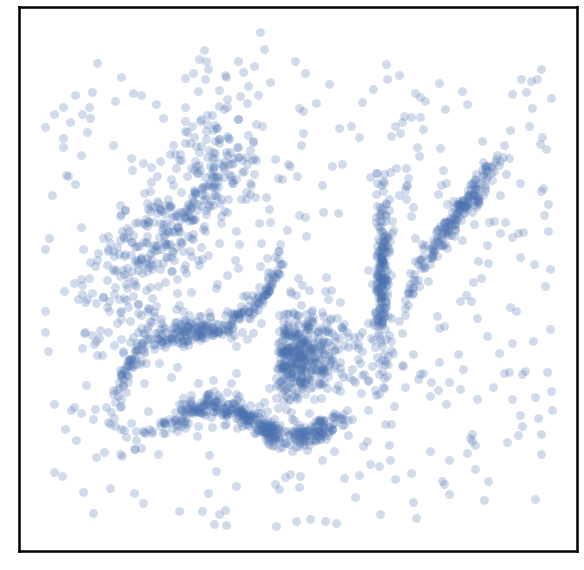

In [84]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [85]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

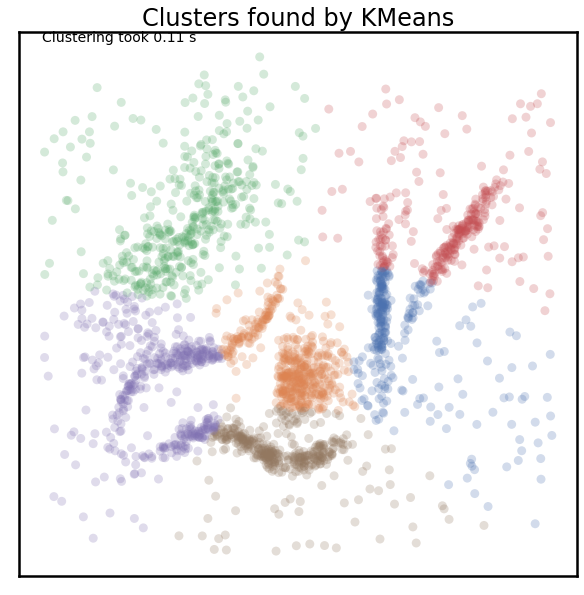

In [86]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

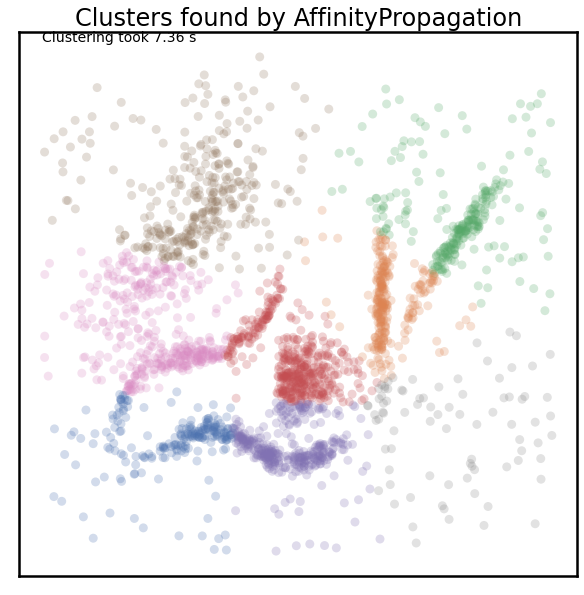

In [87]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

In [88]:
plot_clusters(data, cluster.MeanShift, (0.175,), {'cluster_all':False})

TypeError: __init__() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

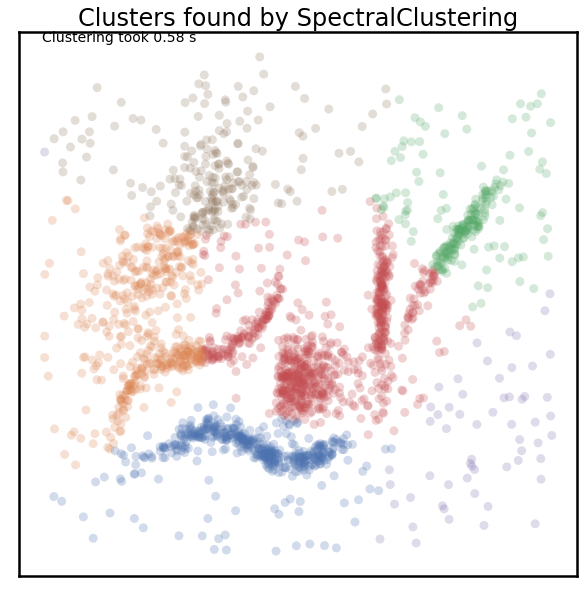

In [89]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

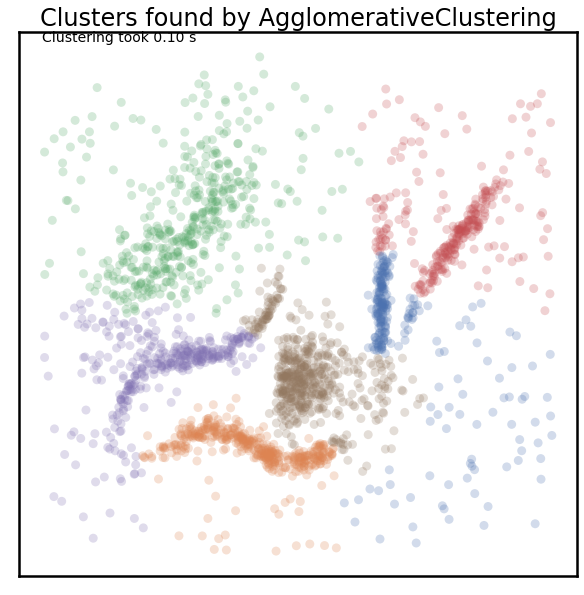

In [90]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

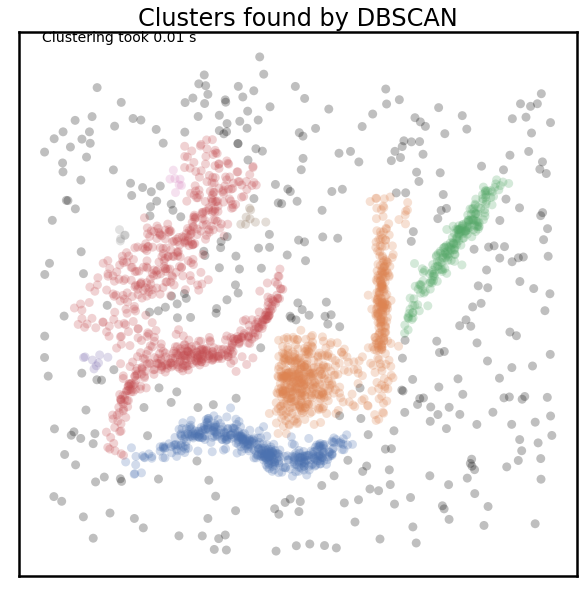

In [91]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

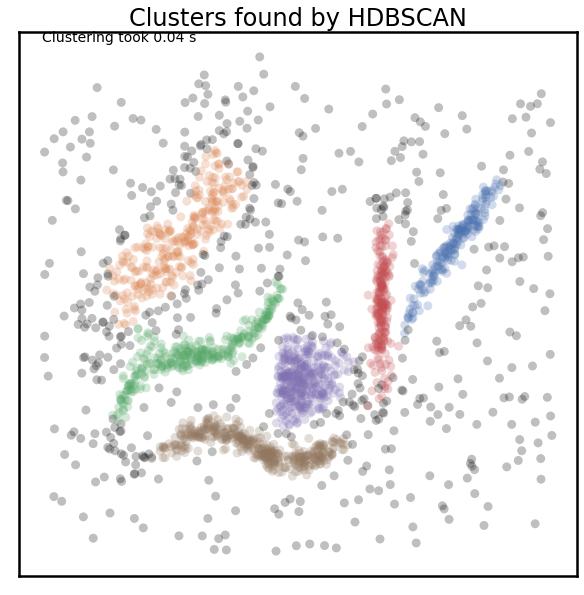

In [92]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})